In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data /quick exploration

In [4]:
data = pd.read_csv('data_adjusted_to_inflation.csv')

In [5]:
data.head()

,Unnamed: 0,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
0,0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.000000,1.033755e+08,3.952161e+08,2.918406e+08
1,1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537000,1.104705e+08,3.544879e+08,2.440174e+08
2,2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.516667,1.245977e+08,4.107520e+08,2.861543e+08
3,3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.000000,6.329114e+07,2.752197e+08,2.119285e+08
4,4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.593917,9.582135e+07,2.714704e+08,1.756491e+08


In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4714 entries, 0 to 4713
Data columns (total 17 columns):
all_titles         4714 non-null object
all_years          4714 non-null int64
all_scores         4714 non-null int64
all_meta           4714 non-null int64
all_votes          4714 non-null int64
all_gross          4714 non-null int64
all_genres         4714 non-null object
id                 4714 non-null object
decade             4714 non-null object
budget             4714 non-null int64
imdb_id            4714 non-null object
genre_bis          4714 non-null object
profit             4714 non-null int64
Index_all_years    4714 non-null float64
budget_adjusted    4714 non-null float64
gross_adjusted     4714 non-null float64
profit_adjusted    4714 non-null float64
dtypes: float64(4), int64(7), object(6)
memory usage: 626.2+ KB


In [8]:
data.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.000000,1.033755e+08,3.952161e+08,2.918406e+08
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537000,1.104705e+08,3.544879e+08,2.440174e+08
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.516667,1.245977e+08,4.107520e+08,2.861543e+08
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.000000,6.329114e+07,2.752197e+08,2.119285e+08
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.593917,9.582135e+07,2.714704e+08,1.756491e+08


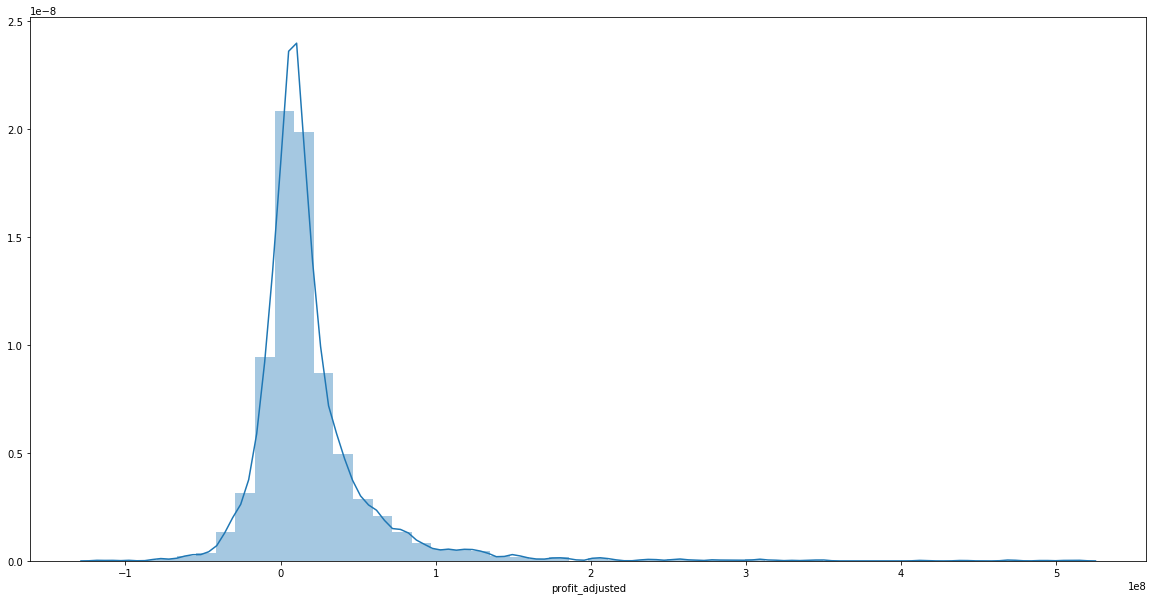

In [12]:
plt.figure(figsize = (20,10))
sns.distplot(data.profit_adjusted)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
all_years,4714.0,1.997816e+03,1.347506e+01,1.915000e+03,1.990000e+03,2.000000e+03,2.008000e+03,2.019000e+03
all_scores,4714.0,6.405388e+01,9.691270e+00,1.900000e+01,5.800000e+01,6.400000e+01,7.100000e+01,9.300000e+01
all_meta,4714.0,4.585342e+01,2.553559e+01,0.000000e+00,3.200000e+01,4.900000e+01,6.400000e+01,1.000000e+02
all_votes,4714.0,1.118024e+05,1.774119e+05,2.300000e+02,1.700375e+04,4.984550e+04,1.269770e+05,2.157599e+06
all_gross,4714.0,5.506381e+07,6.546027e+07,9.074550e+06,1.754019e+07,3.286474e+07,6.446989e+07,9.366622e+08
budget,4714.0,3.268043e+07,4.281290e+07,0.000000e+00,2.337500e+05,1.900000e+07,4.500000e+07,3.800000e+08
profit,4714.0,2.238338e+07,5.090702e+07,-1.869219e+08,4.354540e+05,1.510192e+07,3.358014e+07,6.916622e+08
Index_all_years,4714.0,1.646207e+02,5.717963e+01,1.010833e+01,1.306583e+02,1.722000e+02,2.145370e+02,2.560000e+02
budget_adjusted,4714.0,1.807042e+07,2.120612e+07,0.000000e+00,2.124862e+05,1.196467e+07,2.594637e+07,1.689346e+08
gross_adjusted,4714.0,3.699981e+07,4.449424e+07,3.593108e+06,1.205651e+07,2.243993e+07,4.389225e+07,5.325013e+08


In [15]:
data[data['profit'] == -186921900.0]

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
1005,John Carter,2012,66,51,245185,73078100,"Action, Adventure, Sci-Fi",tt0401729,10s,260000000,tt0401729,Action,-186921900,229.593917,1.132434e+08,3.182928e+07,-8.141413e+07


### SUBSET GENRE ACTION AND ROMANCE

In [16]:
x = data[data['genre_bis'] == 'Action']

In [17]:
y = data[data['genre_bis'] == 'Romance']

### Getting the distribution curve for each genre

The mean for genre Action is : 15174198.188779721
The std for genre Action is : 44940784.10675986
The var for genre Action is : 2019674076130399.5


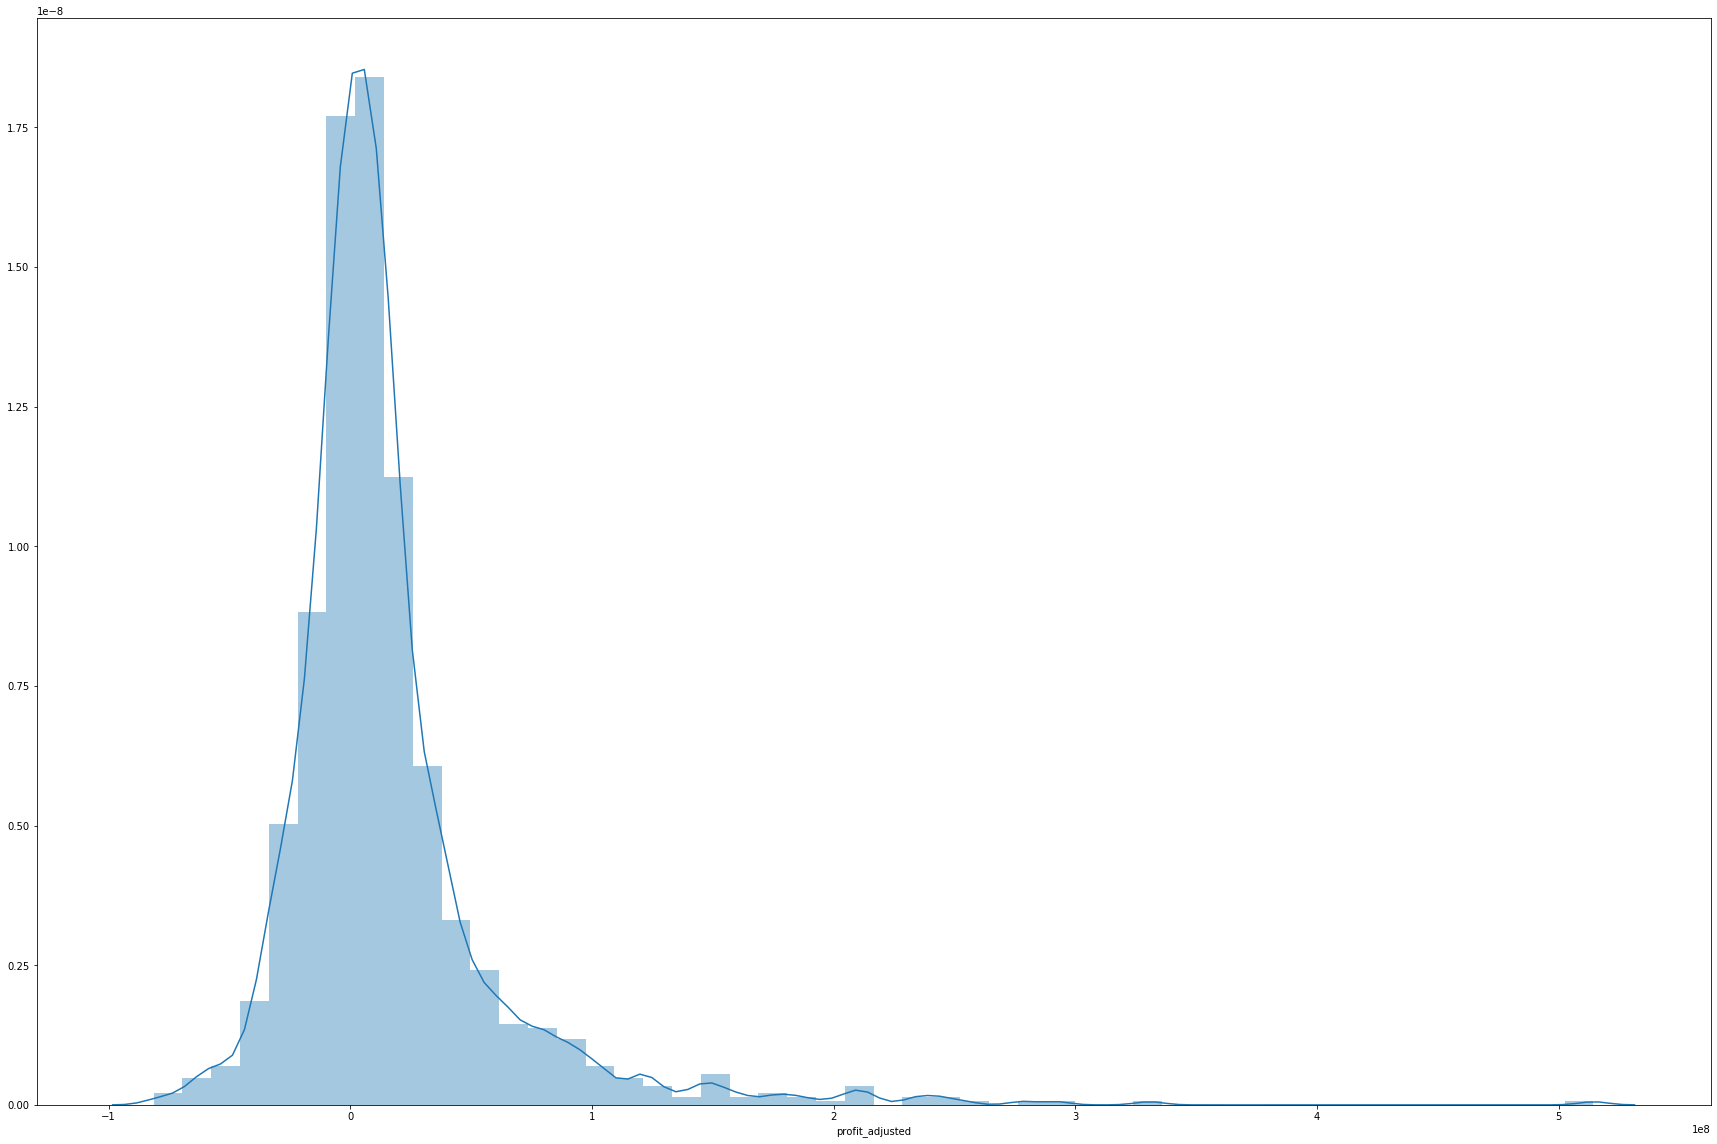

In [19]:
#Action Genre
plt.figure(figsize = (30,20))
sns.distplot(x.profit_adjusted)
print("The mean for genre Action is :",x.profit_adjusted.mean())
print("The std for genre Action is :",x.profit_adjusted.std())
print("The var for genre Action is :",x.profit_adjusted.var())

The mean for genre Romance is : 19559495.21914153
The std for genre Romance is : 34921893.94690736
The var for genre Romance is : 1219538676839044.8


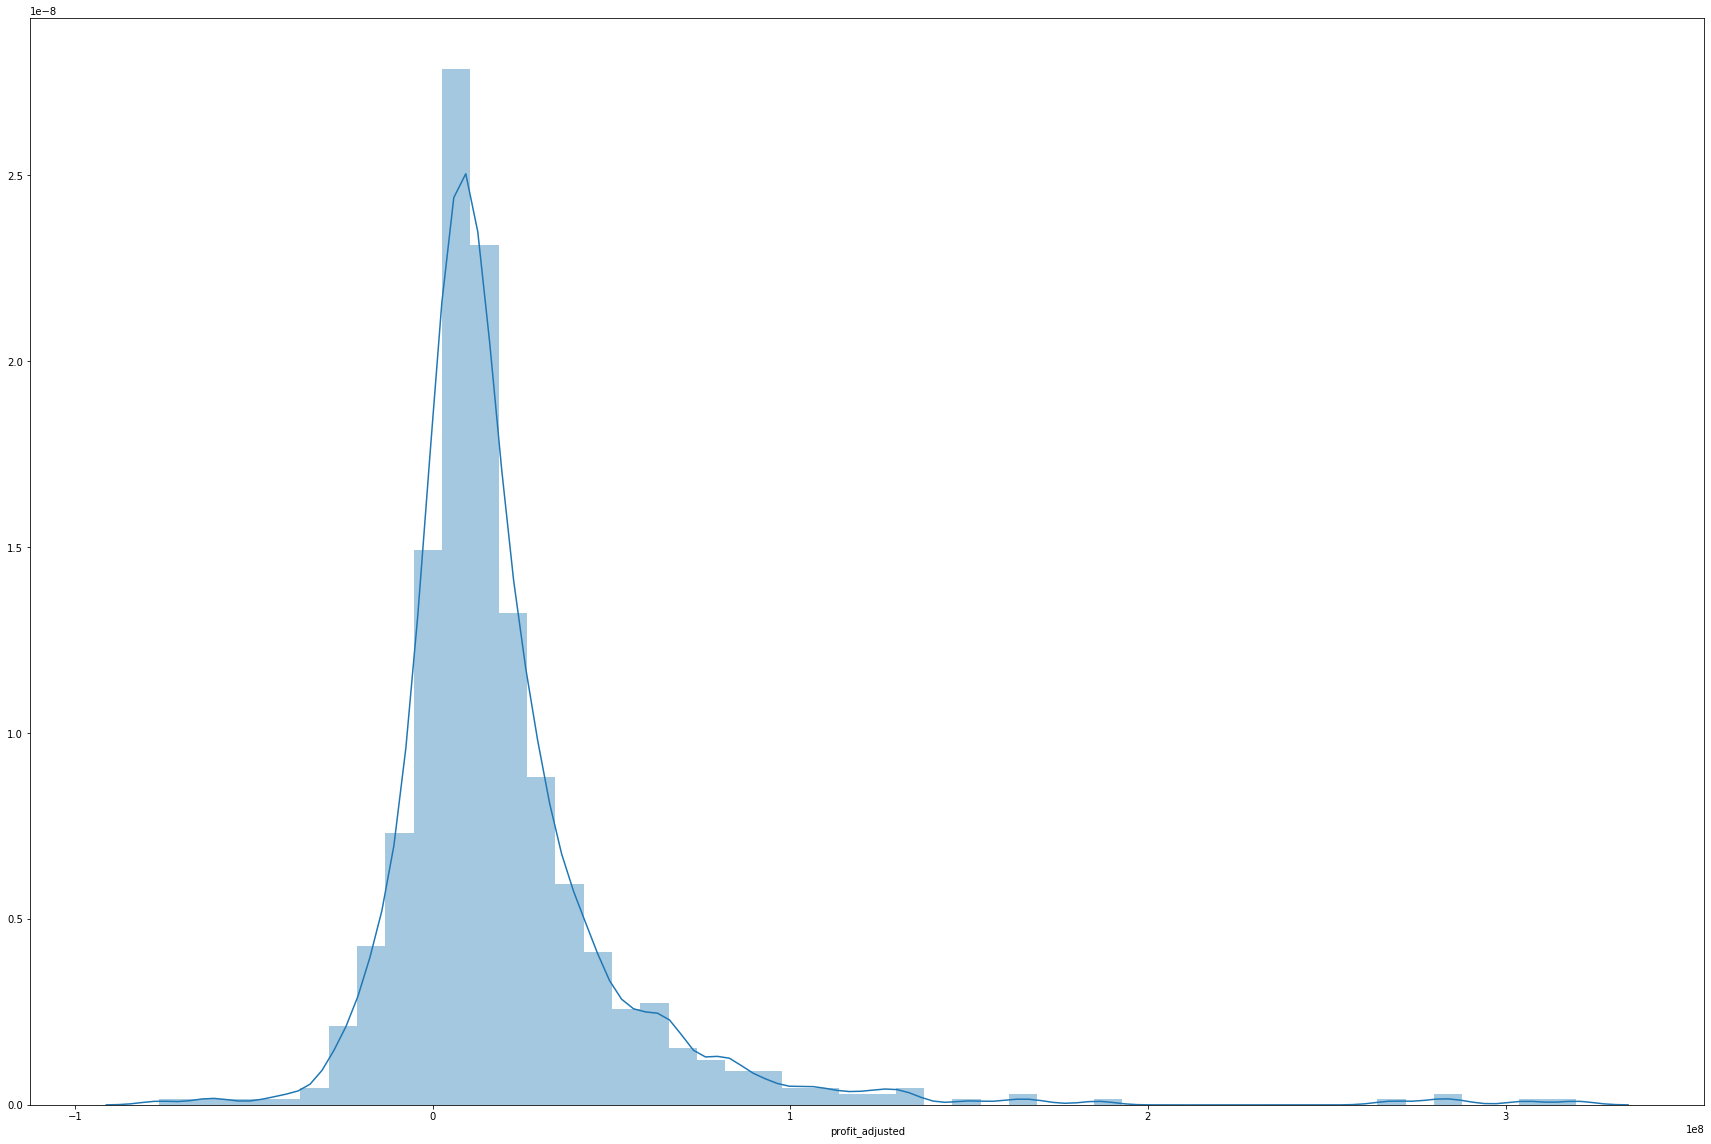

In [20]:
#Romance genre
plt.figure(figsize = (30,20))
sns.distplot(y.profit_adjusted)
print("The mean for genre Romance is :",y.profit_adjusted.mean())
print("The std for genre Romance is :",y.profit_adjusted.std())
print("The var for genre Romance is :",y.profit_adjusted.var())

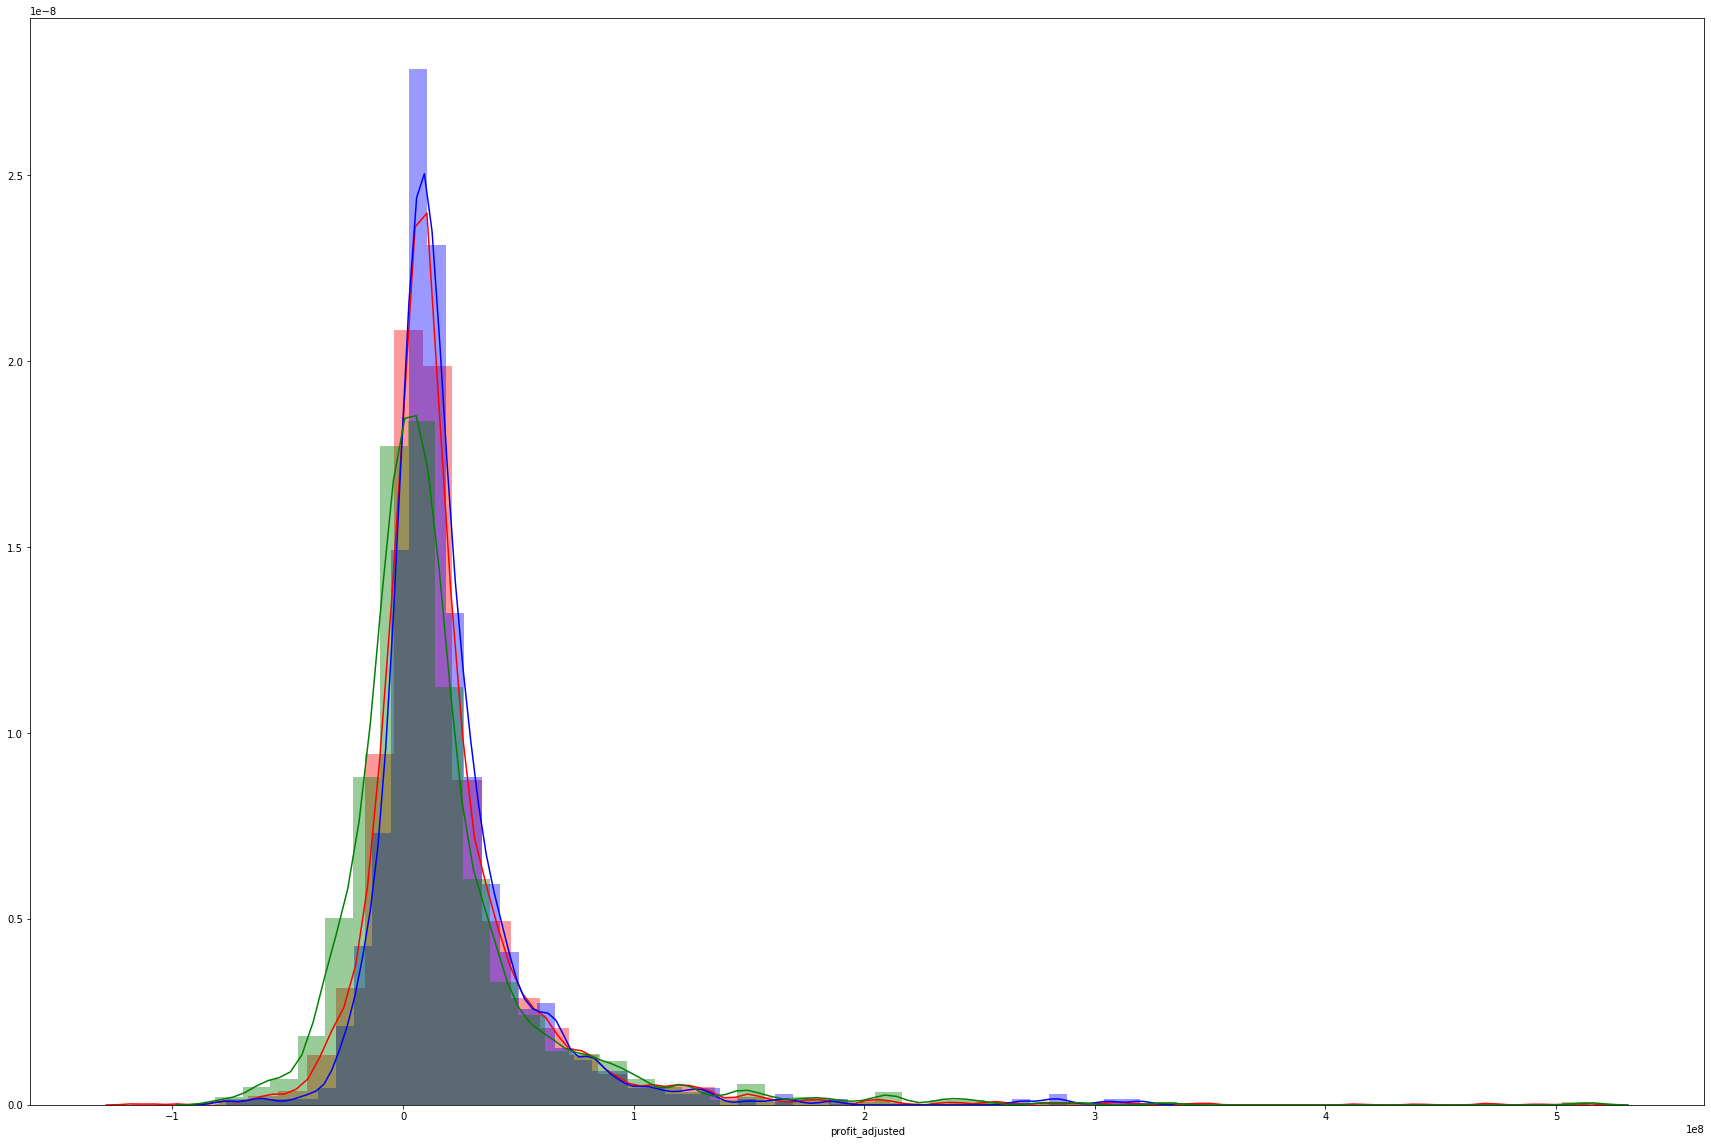

In [22]:
#Combining both plots with the overall data distribution
plt.figure(figsize = (30,20))
sns.distplot(data.profit_adjusted, color ='red')
sns.distplot(y.profit_adjusted, color = 'blue')
sns.distplot(x.profit_adjusted, color = 'green')

### Performing the 2 sample t-test for the Action and Romance Genre

In [23]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

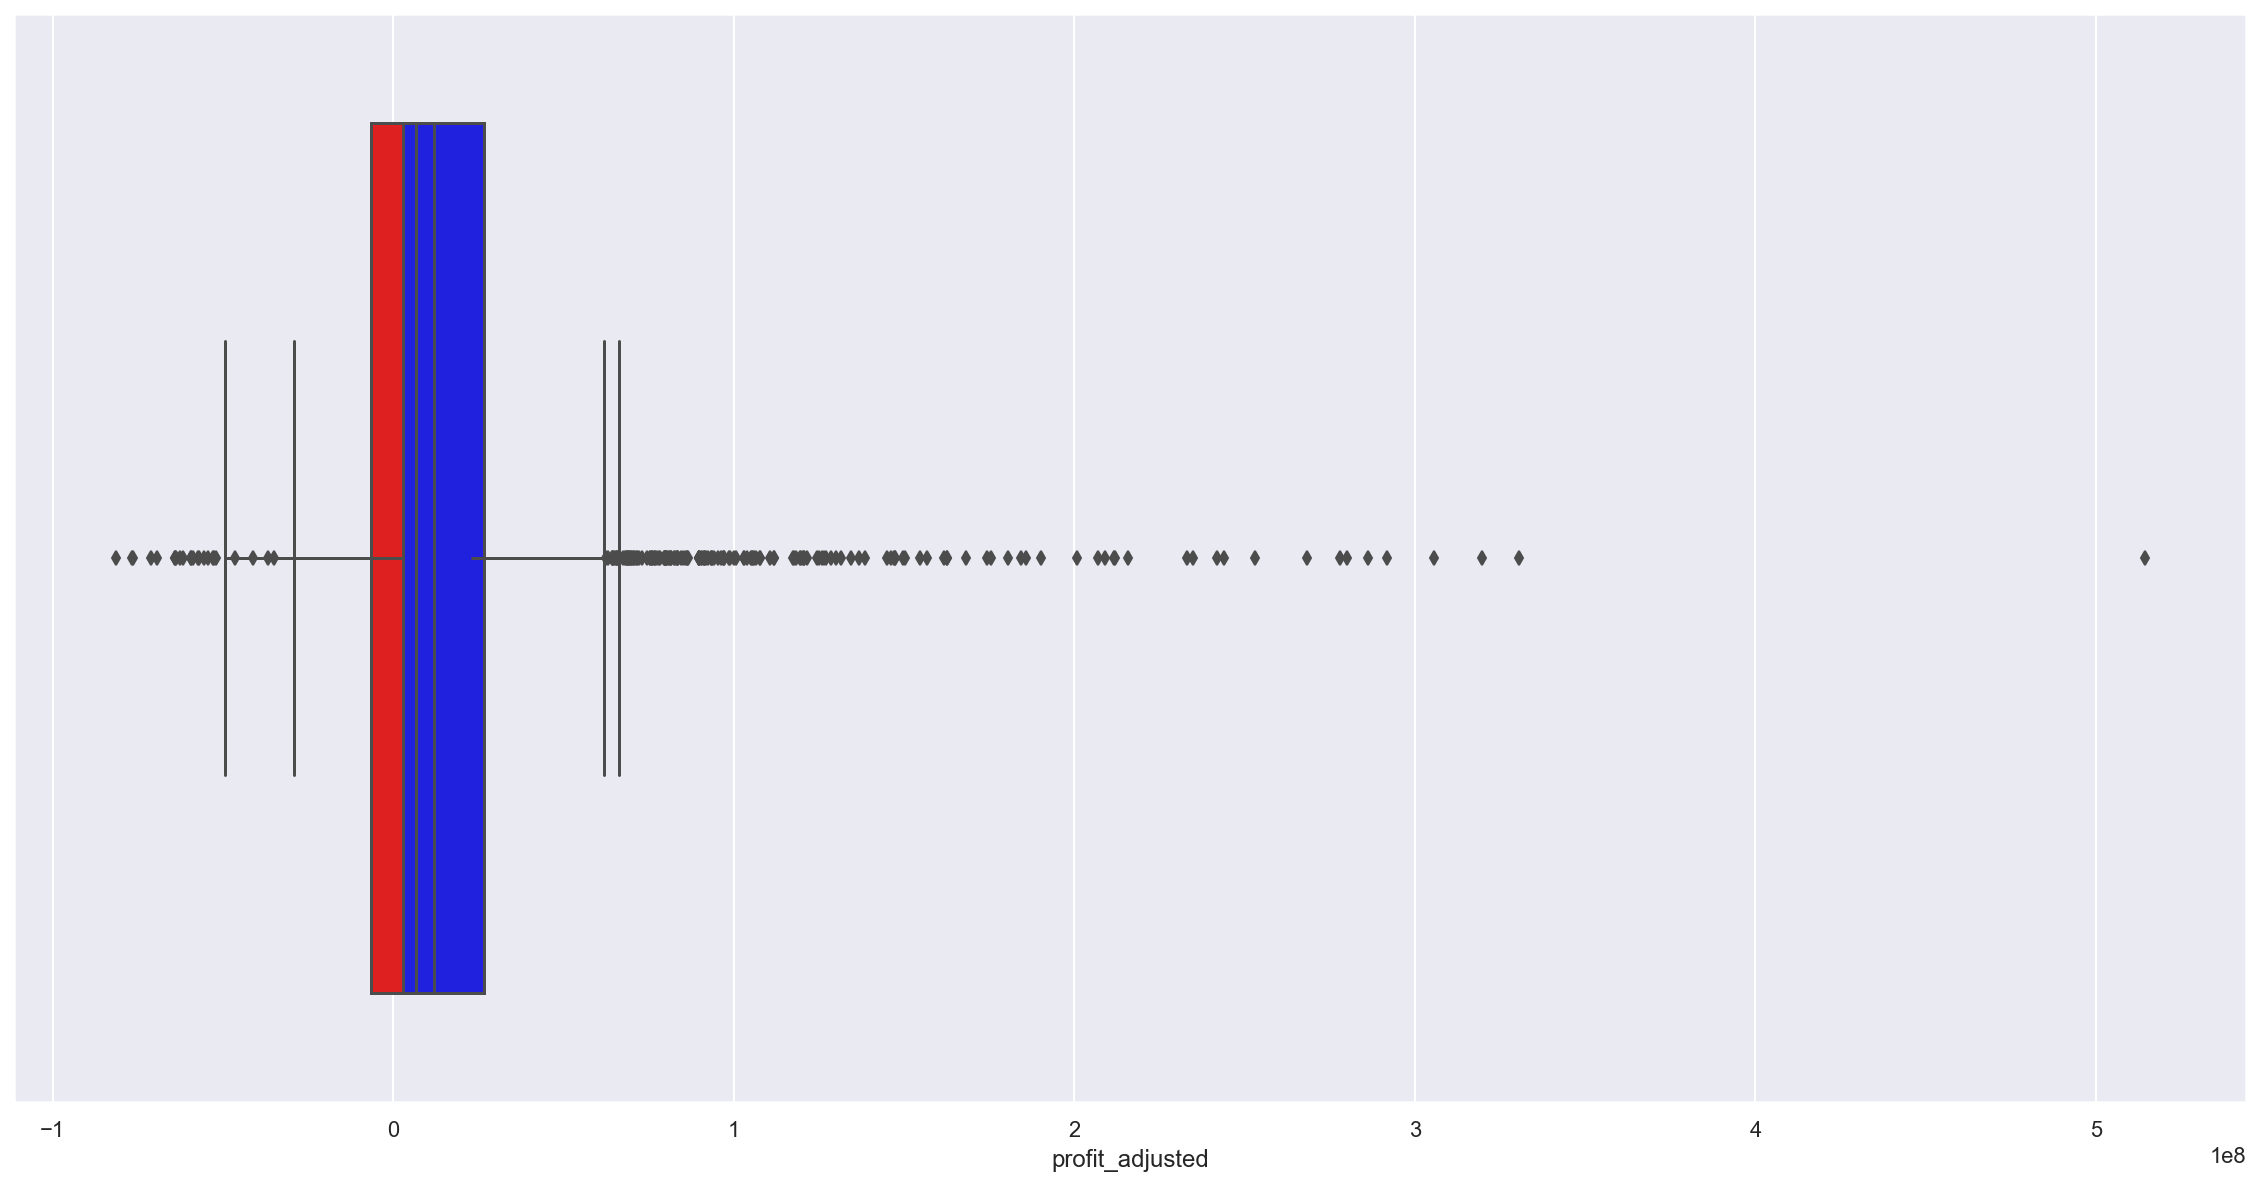

In [27]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x.profit_adjusted, color = 'red') # Action distribution
sns.boxplot(y.profit_adjusted, color = 'blue') # Romance distribution



There are some slight differences between the mean and standard deviation of the Action Genre and Romance genre. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not. As a reminder the five steps to performing a hypothesis test are:

Our five steps to further on carry on this experiment is listed below:

1.Set up null and alternative hypotheses

2.Choose a significance level

3.Calculate the test statistic

4.Determine the critical or p-value (find the rejection region)

5.Compare t-value with critical t-value to reject or fail to reject the null hypothesis

**The Null hypotheis is that there is no difference between the profit margins of the Action Genre and the Romance Genre Ho.**

**The Alternative Hypothesis is that there is a difference between the profit margins of the Action and Romance genre  - Ha**

### 2 SAMPLE T-TEST FOR HYPOTHESIS 1

In [28]:
# difference between samples
diff = x.profit_adjusted.mean() - y.profit_adjusted.mean()
print(diff)

-4385297.030361811


In [32]:
#function to calculate t-statistic
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [33]:
#pooled variance to calculate the variance for both samples
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [34]:
def twosample_tstatistic(data1, data2):
    data1_mean, data2_mean = np.mean(data1), np.mean(data2)
    pool_var = pooled_variance(data1, data2)
    n_e, n_c = len(data1), len(data2)
    num = data1_mean - data2_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

In [35]:
t_stat = twosample_tstatistic(x.profit_adjusted, y.profit_adjusted)
t_stat

-2.3651874254721235

Since it is a 2 sided 2 sample student t-test, a negative value indicates a reversal in the directionality of the effect, which has no bearing on the significance of the difference between groups. just means the sampling of both distributions indicating that profit adjusted for the romance movies have a higher mean

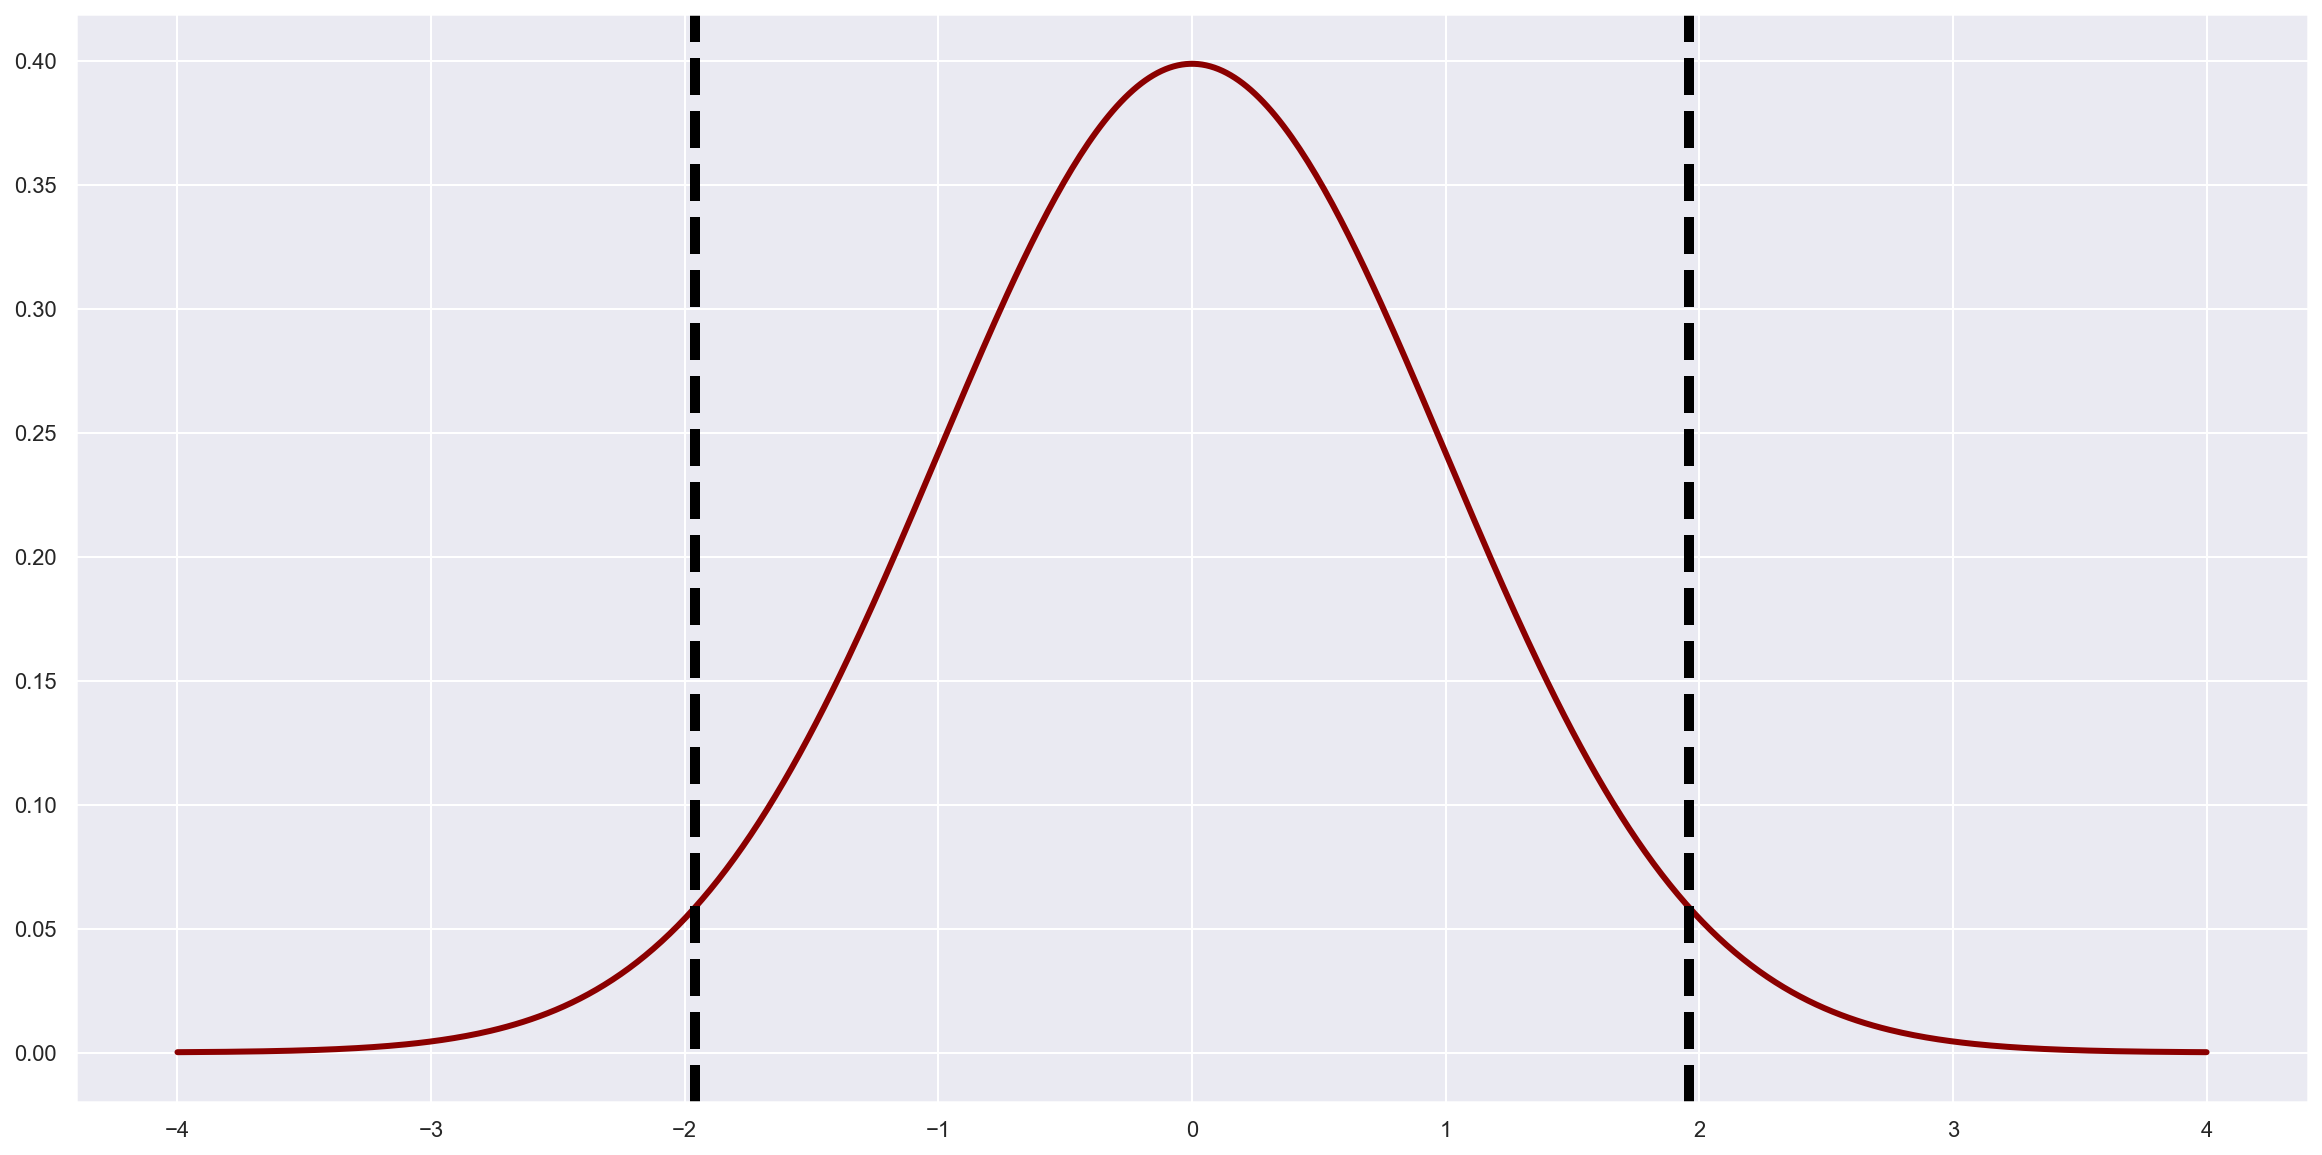

In [36]:
def visualize_t(t_stat, n_data1, n_data2):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_data1: int
    n_data2: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_data1+n_data2-2))
    #a critical value is a point on the test distribution that is compared to the test statistic to 
    #determine whether to reject the null hypothesis or fail to reject teh null hypothesis.
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_data1+n_data2-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    plt.show()
    return None

n_data1 = len(x.profit_adjusted)
n_data2 = len(y.profit_adjusted)
visualize_t(t_stat, n_data1, n_data2)

To calculate the p-value by calculating the total area under curve using stats.t.cdf().

In [39]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-2.36, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(2.36, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.020256598291504637


In [40]:
# using scipy .stats to confirm
"""Calculates the ttest for the means of *two independent* samples of data.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default."""
stats.ttest_ind(x.profit_adjusted, y.profit_adjusted)

Ttest_indResult(statistic=-2.3651874254721017, pvalue=0.018113808895505595)

Since the p-value is less than alpha (p < .05), then there is a strong evidence against the null hypothesis, A statistically significant result cannot prove that a research hypothesis is correct (as this implies 100% certainty).

To calculate the effect size and the probability density function..Effect size emphasises the size of the difference between the two independent variables and also  the Power Analysis, which helps determine the sample size that a study requires to achieve a certain probability of finding a true effect - if there is one.(depending on the p-value)

In [43]:
np.random.seed(30)
import scipy.stats
action_mean = x.profit_adjusted.mean()
action_std = x.profit_adjusted.std()

# Generate a normal distribution for action profit 
action_profit = scipy.stats.norm(action_mean, action_std)
action_profit

In [44]:
romance_mean = y.profit_adjusted.mean()
romance_std = y.profit_adjusted.std()

# Generate a normal distribution for romance profit
romance_profit = scipy.stats.norm(romance_mean, romance_std)
romance_profit

In [45]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

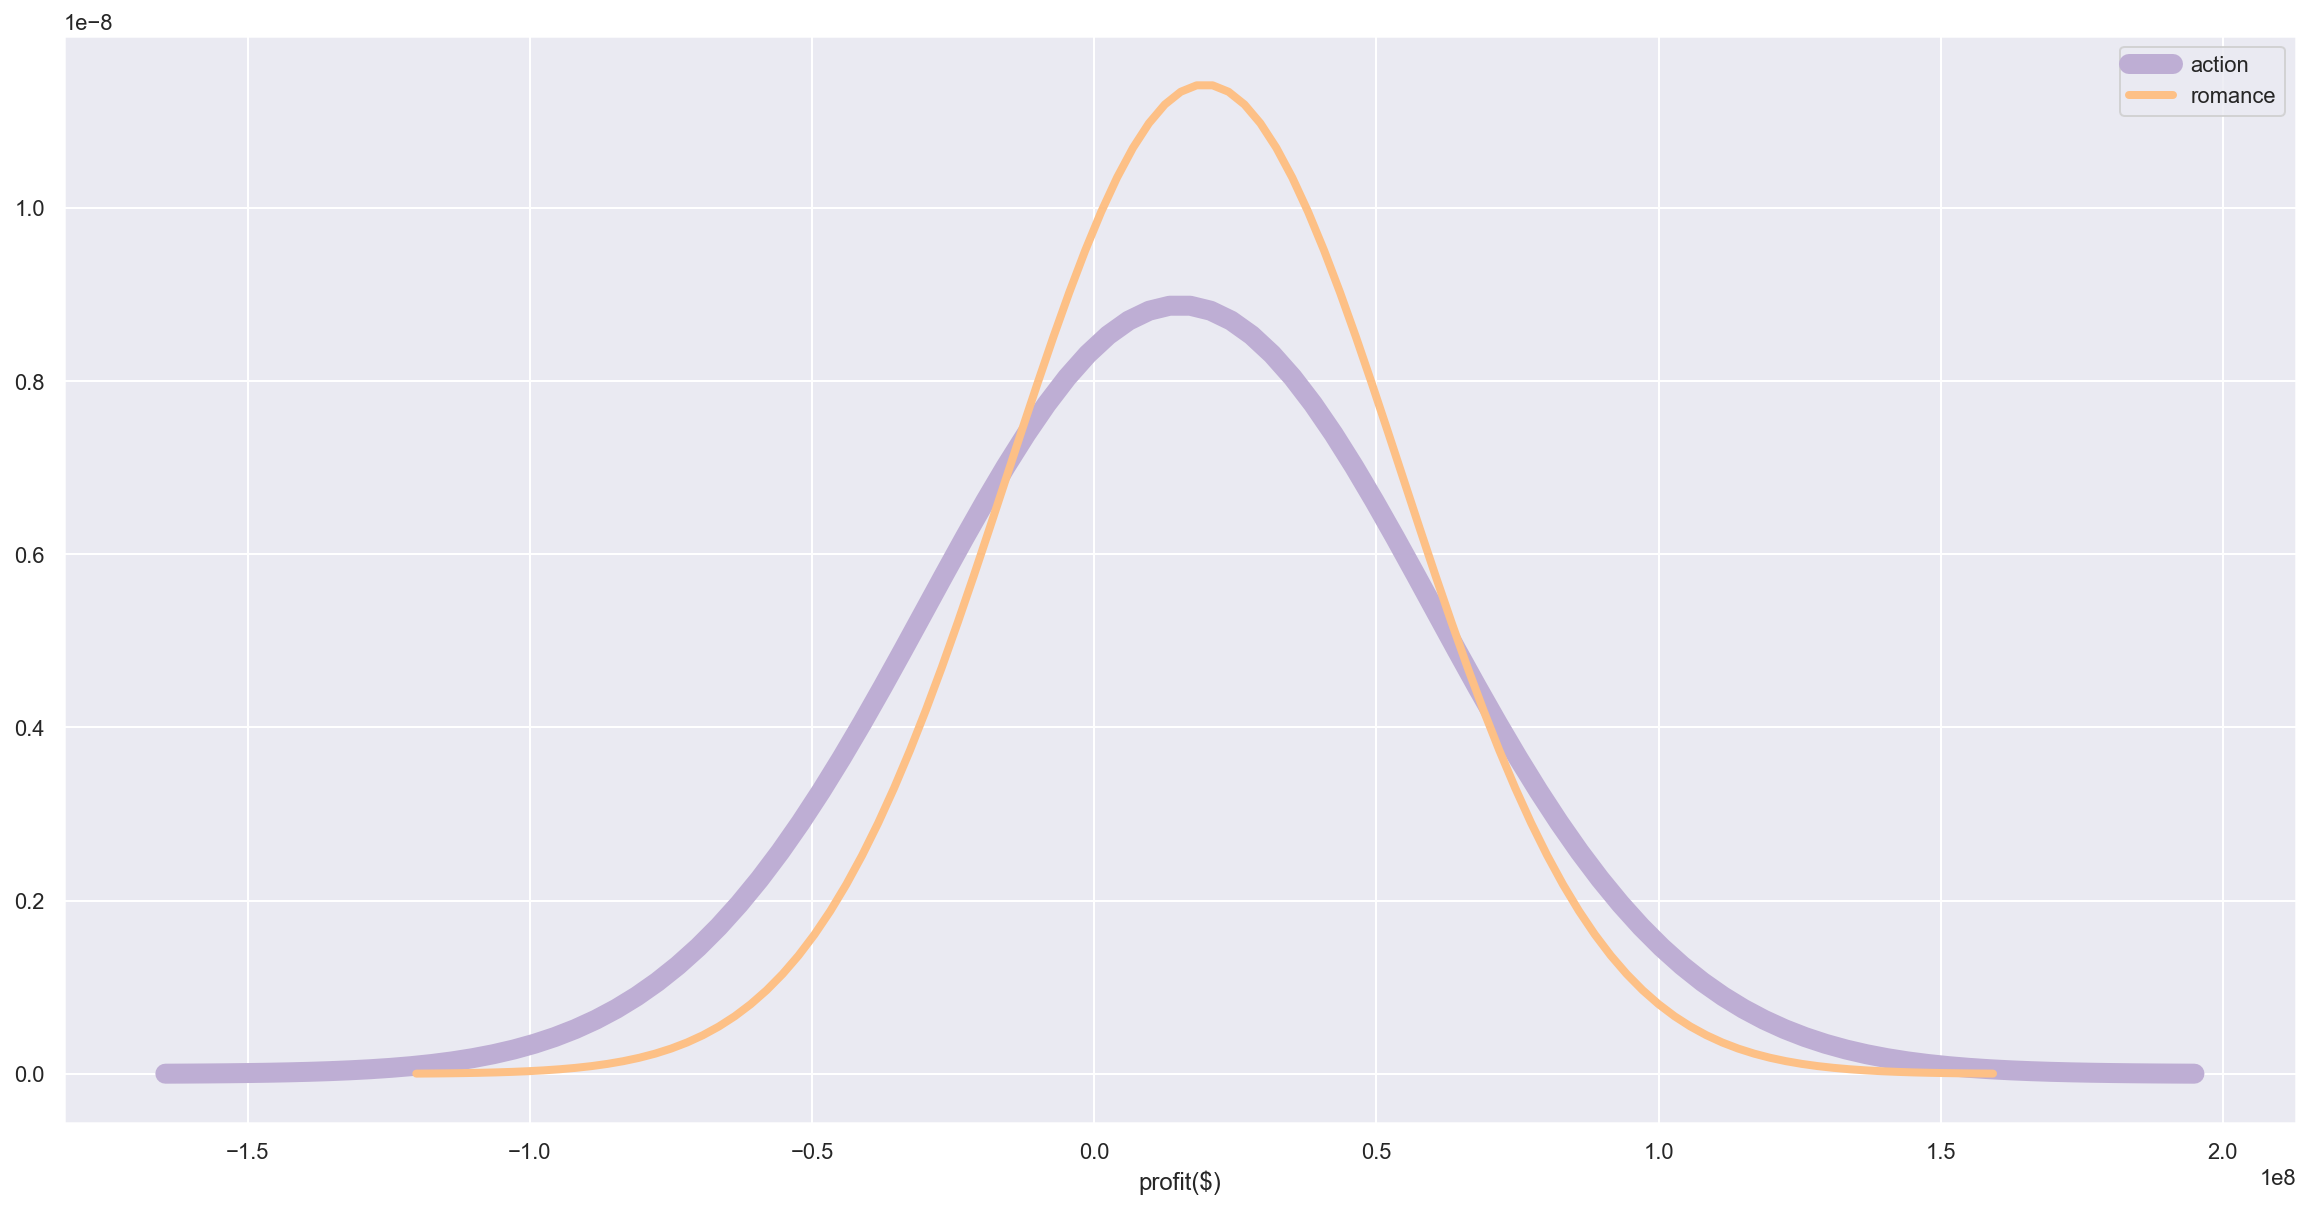

In [47]:
xs, ys = evaluate_PDF(action_profit)
plt.plot(xs, ys, label='action', linewidth=10, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(romance_profit)
plt.plot(xs, ys, label='romance', linewidth=4, color='#fdc086')

plt.xlabel('profit($)')
plt.legend()

For the Un-standardized or Simple Effect Size Calculation

As an unstandardized effect size simply tries to find the difference between two groups(action_profit and romance_profit) by calculating the difference between distribution means.

In [53]:
action_profit.mean()

15174198.188779721

In [48]:
action_sample = action_profit.rvs(1000)
mean1, std1 = action_sample.mean(), action_sample.std()
mean1, std1

(15998615.73767836, 44136450.10511779)

The sample mean is close to the population mean

In [54]:
romance_profit.mean()

19559495.21914153

In [49]:
romance_sample = romance_profit.rvs(1000)
mean2, std2 = romance_sample.mean(), romance_sample.std()
mean2, std2

(20096315.629007638, 33955205.71483085)

The sample mean is also close to the population mean for romance

In [55]:
difference_in_means = action_sample.mean() - romance_sample.mean()
difference_in_means

-4097699.8913292773

This shows that, on average....romance movies make 4.09 million in profit than action movies with values adjusted for inflation

In [58]:
relative_difference = difference_in_means / action_sample.mean()
relative_difference * 100

-25.61284025141487

In [59]:
relative_difference = difference_in_means / romance_sample.mean()
relative_difference * 100

-20.39030420787446

In [60]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

18314585.669426188

A better, but slightly more complicated threshold is the place where the PDFs cross which is calculated above

In [62]:
thresh = (mean1 + mean2) / 2
thresh
    

18047465.683343

The simple threshold above is the mid of both means

In [68]:
action_above_thresh = sum(action_sample > thresh)
action_above_thresh

485

This is the sum of action movie profits above the threshold and below is the sum of romance movies below the threshold

In [69]:
romance_below_thresh = sum(romance_sample < thresh)
romance_below_thresh

470

Text(0.5, 0, 'adjusted_profit($)')

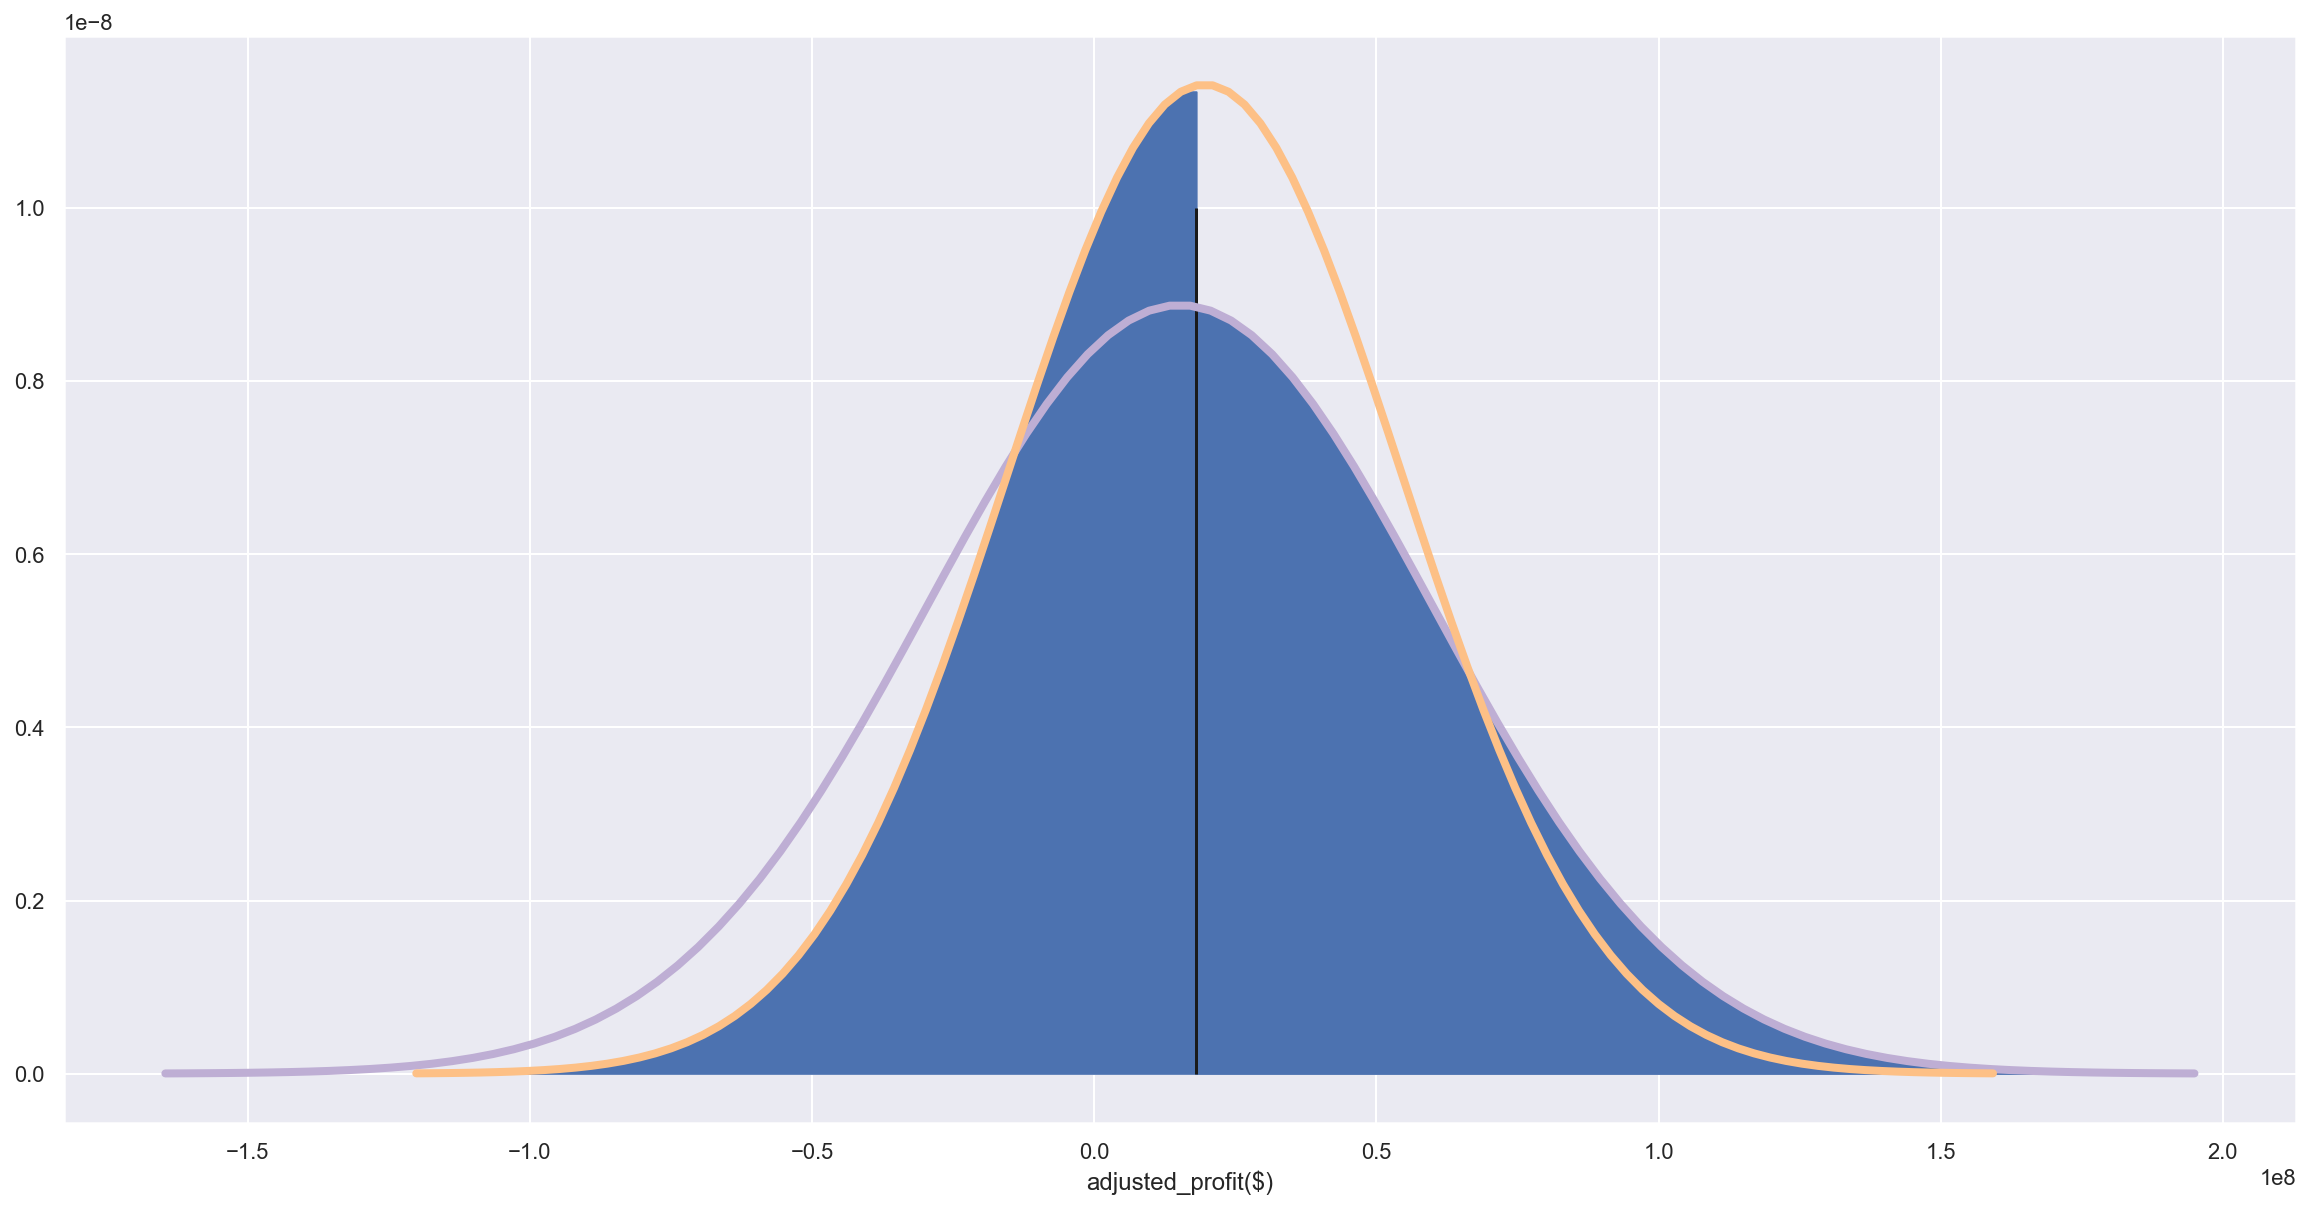

In [70]:
#PDF for both distributions
a_xs,action_ys = evaluate_PDF(action_profit)
plt.plot(a_xs, action_ys, label='action', linewidth=4, color='#beaed4') 

#Female height 
r_xs, romance_ys = evaluate_PDF(romance_profit)
plt.plot(r_xs, romance_ys, label='romance', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.00000001)
plt.fill_betweenx(romance_ys,x1 = r_xs,x2=thresh, where = r_xs < thresh,color='b')
plt.fill_betweenx(action_ys,x1=a_xs,x2=thresh, where = a_xs > thresh,color='b')
plt.xlabel('adjusted_profit($)')

In [71]:
overlap = romance_below_thresh / len(action_sample) + action_above_thresh / len(romance_sample) 
overlap

0.955

In [72]:
misclassification_rate = overlap / 2
misclassification_rate

0.4775

Probability of superiority - If you were to choose a romance and action movie profits at random, what is the probability that the romance movie profit is higher than the action movie profit and the other way around

In [74]:
sum(x > y for x, y in zip(romance_sample, action_sample)) / len(romance_sample)

0.548

In [75]:
sum(x < y for x, y in zip(action_sample, romance_sample)) / len(action_sample)

0.548

In [76]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [78]:
overlap_superiority(romance_profit, 
                    action_profit, n=1000)# overlap superiority for 1000 samples

17366846.703960627


(0.97, 0.535)

Cohen’s d measures the size of an effect in terms of the number of standard deviations

As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

In [79]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [80]:
Cohen_d(romance_sample, action_sample)

0.1040651962995875

cohen's d = 0.1 which mean it has a small effect.

What this essentially means is that you have to look really hard to reject the null hypothesis. The magnitude of the difference in both variables tested is small.

### HYPOTHESIS 2

### WELCH TEST FOR HYPOTHESES 2

Recall that when performing a two-sample t-test, assuming that sample variances are equal, the degrees of freedom equals the total number of observations in the samples minus two.

Specifically, the Student's t-test assumes that the samples are of equal size and equal variance. When these assumptions are not met as we gather that the samples are not equal size and variance, then Welch's t-test provides a more accurate p-value.

**Null Hypothesis Ho - There is no difference in the romance movie budget and action movie budget when we adjust the values for inflation.**
**Alternative Hypothesis Ha - There is a difference in the romance movie budget and the action movie budget when we adjust the values for inflation**

In [83]:
import random 

def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 35)))
    return sample_means

In [84]:
data_for_bugdet = data.replace(0,data.median())

In [86]:
data_for_bugdet.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.000000,1.033755e+08,3.952161e+08,2.918406e+08
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537000,1.104705e+08,3.544879e+08,2.440174e+08
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.516667,1.245977e+08,4.107520e+08,2.861543e+08
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.000000,6.329114e+07,2.752197e+08,2.119285e+08
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.593917,9.582135e+07,2.714704e+08,1.756491e+08


In [91]:
action_movies = np.array(data_for_bugdet[data_for_bugdet['genre_bis'] == "Action"]['budget_adjusted'])
romance_movies = np.array(data_for_bugdet[data_for_bugdet['genre_bis']== "Romance"]['budget_adjusted'])

In [93]:
action2_sample_means = samples_means(action_movies, 30)
romance2_sample_means = samples_means(romance_movies, 30)

In [94]:
print(action2_sample_means, romance2_sample_means)

[31802266.388693776, 30331661.1028323, 24772872.58762782, 27757846.737513263, 30770947.442172304, 30421094.299516063, 30484809.801766228, 38291134.805201836, 44058830.35768482, 32924515.02604533, 32852123.75872127, 29681420.73428338, 33649703.244525015, 29639284.64399148, 29965856.40404952, 36008535.448399976, 29492018.07963733, 26110571.023601502, 33737673.50116325, 32599432.115963954, 23350770.83463701, 29374254.933004413, 32153545.249224763, 32333529.48423748, 31100651.74855015, 33843286.689151816, 36008644.17566644, 30121092.41930821, 22578387.29666745, 29711903.301285043] [12871147.599052904, 15275948.957891576, 17751660.686105706, 15540158.995498136, 15709743.070347892, 13331424.512589816, 16848118.211557847, 13015383.118515605, 17347028.299356963, 14865711.371419622, 16160487.146442322, 13764837.03812746, 13636552.361504728, 16036745.073123204, 17637960.68250707, 14749338.76591409, 16916201.742941067, 17362729.322518706, 15858581.190664839, 14289965.688196793, 13724887.268457865

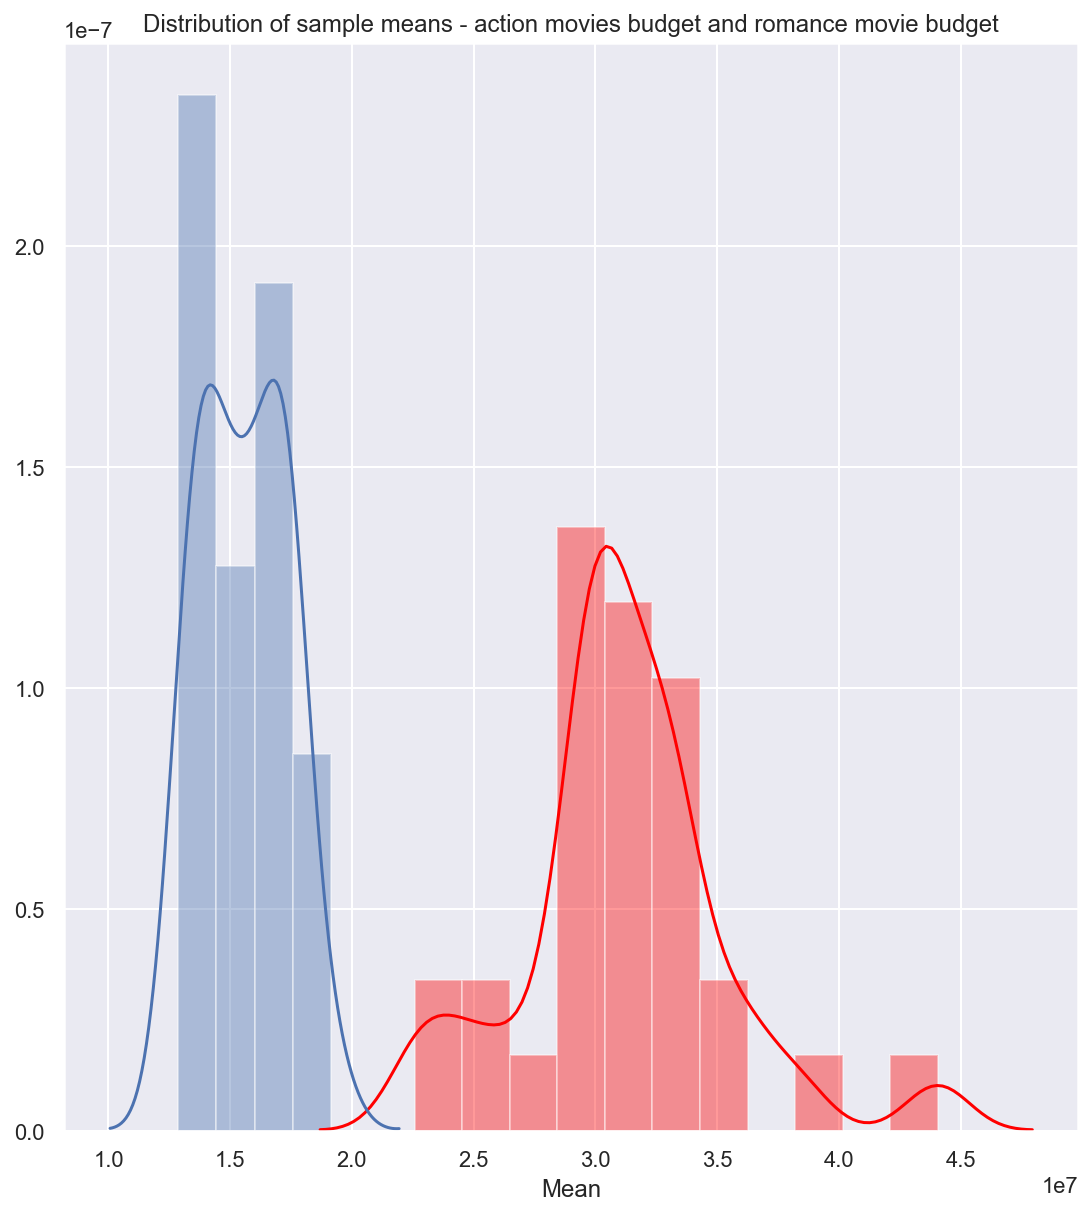

In [97]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(action2_sample_means, axlabel='Mean', color = 'red')

#plt.subplot(1,2,2)
sns.distplot(romance2_sample_means)
plt.title("Distribution of sample means - action movies budget and romance movie budget")
plt.show()

In [99]:
## Back to the two "populations"
print("The mean for action movies budget is :",action_movies.mean())
print("The std for action movies budget:",action_movies.std())
print("The var for action movies budget :",action_movies.var())

The mean for action movies budget is : 31151678.802436803
The std for action movies budget: 24846145.118179355
The var for action movies budget : 617330927233627.9


In [100]:
print("The mean for romance movies budget is :",romance_movies.mean())
print("The std for romance movies budget is :",romance_movies.std())
print("The var for romance movies budget :",romance_movies.var())

The mean for romance movies budget is : 15246935.194475973
The std for romance movies budget is : 11464867.524207868
The var for romance movies budget : 131443187347636.25


In [101]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(action_movies, romance_movies)))


Wlech T-test is: 19.48893983371565


In [102]:
### Degrees of freedom

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(action_movies, romance_movies)))


Wlech degrees of freedom are: 1833.9238622128369


In [103]:
t = welch_t(action_movies, romance_movies)
df = welch_df(action_movies, romance_movies)

### Convert to p-value

import scipy.stats as stats

p = 1 - float(stats.t.cdf(t, df))
print(p)


0.0


In this case, there is a 0% probability you would see a t-score equal to or greater than what you saw from the data. Given that alpha was set at 0.05, this would constitute sufficient evidence to reject the null hypothesis.

**using cohen'd to calculate the effect size**

In [108]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = np.array(group1).mean() - np.array(group2).mean()

    n1, n2 = len(group1), len(group2)
    var1 = np.array(group1).var()
    var2 = np.array(group2).var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [109]:
Cohen_d(action2_sample_means, romance2_sample_means)

4.896232020333647

The cohen's d value is 4.89 which is a large value and means a large effect size thereby implying there is a high probability of a difference in the mean budget of A romance movie when compared to an action movie if samples are randomly chosen. We should be able to reject teh null hypotheis with further scientific study